In [1]:
import pandas as pd

In [2]:
movies=pd.read_csv("./movies/movies.csv")

In [3]:
#displaying first few rows
movies.head()

,Unnamed: 0,adult,backdrop_path,genre_ids,id,origin_country,original_language,original_name,overview,popularity,poster_path,first_air_date,name,vote_average,vote_count
0,0,False,/AvsNXUbP7UKCVnypyx2eWp8z2N3.jpg,"[16, 35, 10765]",94954,['US'],en,Hazbin Hotel,In attempt to find a non-violent alternative f...,284.991,/rXojaQcxVUubPLSrFV8PD4xdjrs.jpg,2024-01-18,Hazbin Hotel,9.064,715
1,1,False,/9faGSFi5jam6pDWGNd0p8JcJgXQ.jpg,"[18, 80]",1396,['US'],en,Breaking Bad,"Walter White, a New Mexico chemistry teacher, ...",775.808,/ztkUQFLlC19CCMYHW9o1zWhJRNq.jpg,2008-01-20,Breaking Bad,8.905,13250
2,2,False,/rkB4LyZHo1NHXFEDHl9vSD9r1lI.jpg,"[16, 18, 10765, 10759]",94605,['US'],en,Arcane,Amid the stark discord of twin cities Piltover...,149.570,/fqldf2t8ztc9aiwn3k6mlX3tvRT.jpg,2021-11-06,Arcane,8.751,3659
3,3,False,/2rmK7mnchw9Xr3XdiTFSxTTLXqv.jpg,"[10759, 35, 16]",37854,['JP'],ja,ワンピース,"Years ago, the fearsome Pirate King, Gol D. Ro...",184.149,/cMD9Ygz11zjJzAovURpO75Qg7rT.jpg,1999-10-20,One Piece,8.700,4362
4,4,False,/kU98MbVVgi72wzceyrEbClZmMFe.jpg,"[16, 10759, 10765]",246,['US'],en,Avatar: The Last Airbender,"In a war-torn world of elemental magic, a youn...",336.637,/5HK6t0yxt0p0L5d3lI7H6iU8YsV.jpg,2005-02-21,Avatar: The Last Airbender,8.716,3807


In [4]:
#displaying summary of the dataset
movies.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,949.500000,59088.161053,166.461221,7.766300,948.430000
std,548.627074,43638.537186,223.979275,0.518022,1618.092917
min,0.000000,36.000000,4.329000,6.300000,200.000000
25%,474.750000,14332.250000,54.655250,7.400000,284.000000
50%,949.500000,63127.000000,99.589000,7.800000,457.000000
75%,1424.250000,88087.250000,188.510500,8.175250,910.750000
max,1899.000000,236873.000000,2763.917000,9.064000,22795.000000


In [5]:
#displaying information about the dataset
movies.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1900 non-null   int64  
 1   adult              1900 non-null   bool   
 2   backdrop_path      1897 non-null   object 
 3   genre_ids          1900 non-null   object 
 4   id                 1900 non-null   int64  
 5   origin_country     1900 non-null   object 
 6   original_language  1900 non-null   object 
 7   original_name      1900 non-null   object 
 8   overview           1880 non-null   object 
 9   popularity         1900 non-null   float64
 10  poster_path        1899 non-null   object 
 11  first_air_date     1900 non-null   object 
 12  name               1900 non-null   object 
 13  vote_average       1900 non-null   float64
 14  vote_count         1900 non-null   int64  
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 1.9 MB


In [6]:
#checking how many null values are in each column
movies.isna().sum()

Unnamed: 0            0
adult                 0
backdrop_path         3
genre_ids             0
id                    0
origin_country        0
original_language     0
original_name         0
overview             20
popularity            0
poster_path           1
first_air_date        0
name                  0
vote_average          0
vote_count            0
dtype: int64

In [7]:
#checking the data type of each column
movies.dtypes

Unnamed: 0             int64
adult                   bool
backdrop_path         object
genre_ids             object
id                     int64
origin_country        object
original_language     object
original_name         object
overview              object
popularity           float64
poster_path           object
first_air_date        object
name                  object
vote_average         float64
vote_count             int64
dtype: object

In [8]:

# Data cleaning and preprocessing the dataframe by

    #dropping irrelevant columns and columns with missing values
movies_updated=movies.drop(columns=["Unnamed: 0","backdrop_path","genre_ids","poster_path","vote_average","vote_count"])

    #filling the null values in overview column
movies_updated.fillna({"overview":"No overview available"},inplace=True)

    #standardizing column formats and adding new columns
movies_updated=movies_updated.astype({"origin_country":"category","original_language":"category","popularity":"float32","first_air_date":"datetime64[ns]"})

    #reordering the columns 
movies_updated=movies_updated.reindex(columns=["id","first_air_date","original_name","name","overview","adult","popularity","original_language","origin_country"])
movies_updated


,id,first_air_date,original_name,name,overview,adult,popularity,original_language,origin_country
0,94954,2024-01-18,Hazbin Hotel,Hazbin Hotel,In attempt to find a non-violent alternative f...,False,284.990997,en,['US']
1,1396,2008-01-20,Breaking Bad,Breaking Bad,"Walter White, a New Mexico chemistry teacher, ...",False,775.807983,en,['US']
2,94605,2021-11-06,Arcane,Arcane,Amid the stark discord of twin cities Piltover...,False,149.570007,en,['US']
3,37854,1999-10-20,ワンピース,One Piece,"Years ago, the fearsome Pirate King, Gol D. Ro...",False,184.149002,ja,['JP']
4,246,2005-02-21,Avatar: The Last Airbender,Avatar: The Last Airbender,"In a war-torn world of elemental magic, a youn...",False,336.636993,en,['US']
...,...,...,...,...,...,...,...,...,...
1895,35339,2012-01-16,Alcatraz,Alcatraz,"A unique team, consisting of a federal agent, ...",False,66.716003,en,['US']
1896,1466,2004-09-08,Joey,Joey,"The charming and still-single Joey, who has st...",False,156.520996,en,['US']
1897,60626,2014-03-11,From Dusk Till Dawn: The Series,From Dusk Till Dawn: The Series,The horror and crime thriller genres collide i...,False,90.696999,en,['US']
1898,92783,2022-08-18,She-Hulk: Attorney at Law,She-Hulk: Attorney at Law,Jennifer Walters navigates the complicated lif...,False,107.142998,en,['US']


origin_country
['US']    1073
['JP']     266
['GB']     108
dtype: int64

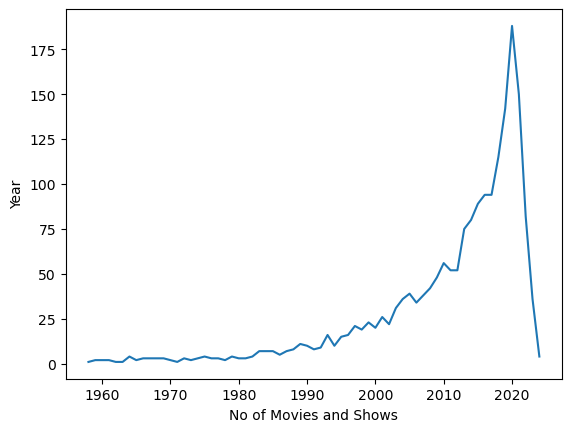

In [12]:
# Performing data analysis by

    #identifying top 10 rated movies and shows
movies_updated.sort_values("popularity",ascending=False)["name"].iloc[0:10]
    
    #analysing how many movies and shows were released each year
movies_updated["release_year"]=movies_updated["first_air_date"].dt.year
movies_updated.groupby("release_year").size().plot(xlabel="No of Movies and Shows",ylabel="Year");

    #identifying which language is the most common among movies and shows(Top 3)
movies_updated.groupby("original_language").size().sort_values(ascending=False).iloc[0:3]

    #identifying how many movies and shows originated from each country(Top 3)
movies_updated.groupby("origin_country").size().sort_values(ascending=False).iloc[0:3]
